# Web traffic timeseries

https://www.kaggle.com/c/web-traffic-time-series-forecasting

## Build a basic model

In [1]:
import numpy as np
import pandas as pd

In [2]:
training_set_sample = pd.read_csv('train_1_sample.csv')

In [130]:
training_set_sample[0:5]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [178]:
p1_data = (np.array(training_set_sample)[:,1:2]).astype('float32')

In [179]:
p1_data

array([[ 18.],
       [ 11.],
       [  1.],
       ..., 
       [  1.],
       [  2.],
       [ 14.]], dtype=float32)

In [180]:
p1_data.shape

(2999, 1)

In [188]:
for i in range(0, len(p1_data)):
	if pd.isnull(p1_data[i]):
		p1_data[i] =avg

In [189]:
p1_x = []
p1_y = []
for i in range(100, len(p1_data)):
	p1_x.append(p1_data[i - 100: i, 0])
	p1_y.append(p1_data[i, 0])

p1_x_np = np.array(p1_x)
p1_x_np = np.reshape(p1_x_np, (p1_x_np.shape[0], p1_x_np.shape[1], 1))
p1_y_np = np.array(p1_y)

In [190]:
model = Sequential()

In [191]:
from keras.models import Sequential
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(units = 10, input_shape= (p1_x_np.shape[1], 1)))
model.add(Dense(units = 1))

model.compile(optimizer='rmsprop', loss='mse')
model.fit(p1_x_np, p1_y_np, epochs = 2)

pred_in = p1_data[100:200,0]
pred_in_r = np.reshape(pred_in, (-1,100,1))

model.predict(pred_in_r)

Epoch 1/2
2899/2899 [==============================] - 28s - loss: 18307.0709    
Epoch 2/2
2899/2899 [==============================] - 29s - loss: 18254.8689    


array([[ 2.72745204]], dtype=float32)

### Basic model with multiple pages as input

replace all NaN in each row with average of that row

In [288]:
training_set_sample.shape

(50, 551)

In [289]:
training_set_sample = training_set_sample[0:50]

In [290]:
def reshapek(k):
    return k.reshape(k.shape[0], k.shape[1], 1)

In [294]:
print(len(training_set_sample.iloc[10,1:]))

550


In [324]:
p = 100
p_x = np.array([[]])
p_y = np.array([])
for i in range(0, training_set_sample.shape[0]):
    row = training_set_sample.iloc[i,1:]
    avg = np.average(row[pd.notnull(row)])
    new_row = row.fillna(avg)
    for j in range(p, len(row)):
        #print(i, j)
        if i == 0 and j == p:
            p_x = new_row[0: p]
            p_y = new_row[p]
        else:
            p_x = np.vstack((p_x, new_row[j - p: j]))
            #print(p_x.shape)
            p_y = np.vstack((p_y, new_row[p]))
            #np.append(p_y, new_row[p])

In [314]:
print(p_x.shape)
print(p_y.shape)

(22500, 100)
(22500, 1)


In [315]:
from keras.models import Sequential
from keras.layers import LSTM

In [322]:
p_x_reshaped = p_x.reshape(p_x.shape[0], p_x.shape[1], 1)

In [321]:
model = Sequential()
model.add(LSTM(units = 10, input_shape= (pall_x.shape[1], 1)))
model.add(Dense(units = 1))

model.compile(optimizer='rmsprop', loss='mse')
model.fit(p_x_reshaped, p_y, epochs = 2)

Epoch 1/2
22500/22500 [==============================] - 225s - loss: 874.2990   
Epoch 2/2
22500/22500 [==============================] - 211s - loss: 645.9307   


# Analyse the data

Load entire dataset

In [115]:
training_set = pd.read_csv('train_1.csv')

understand the shape

In [5]:
training_set.shape

(145063, 551)

look at a sample

In [6]:
training_set[0:5]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


## Split page column

In [ ]:
df_new = pd.DataFrame([i.split("_")[-3:] for i in training_set.Page], columns = ['project', 'access', 'agent'])

In [131]:
training_set = training_set.drop('Page', 1)

In [165]:
train_new = pd.concat([training_set, df_new], axis = 1)
train_new[0:5]

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,project,access,agent
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh.wikipedia.org,all-access,spider
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh.wikipedia.org,all-access,spider
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh.wikipedia.org,all-access,spider
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh.wikipedia.org,all-access,spider
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,3.0,11.0,27.0,13.0,36.0,10.0,zh.wikipedia.org,all-access,spider


## Fill NaNs /Drop

In [167]:
num_nans = train_new.isnull().T.any().sum()

In [168]:
float(num_nans)/train_new.size * 100

0.034637317085615196

only 0.03% of rows have NaNs, will drop those rows instead of filling with mean, then use the model built to predict those values and retrain the model

In [169]:
train_no_na = train_new.dropna()

In [170]:
train_no_na.shape

(117277, 553)

In [171]:
train_no_na[0:5]

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,project,access,agent
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh.wikipedia.org,all-access,spider
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh.wikipedia.org,all-access,spider
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh.wikipedia.org,all-access,spider
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh.wikipedia.org,all-access,spider
5,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,7.0,...,17.0,32.0,19.0,23.0,17.0,17.0,50.0,zh.wikipedia.org,all-access,spider


### Analyze the project, access and agent

In [201]:
np.unique(train_no_na.agent.values)

array(['all-agents', 'spider'], dtype=object)

In [215]:
%matplotlib inline
from collections import Counter
def plothist(series):
    counter = Counter(series.values)
    pd.DataFrame.from_dict(counter, orient='index').plot(kind='bar')

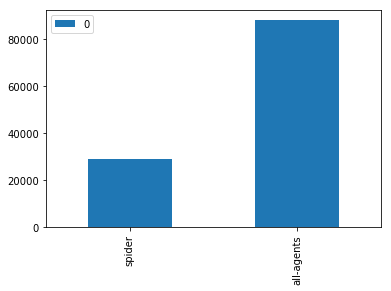

In [216]:
plothist(train_no_na.agent)

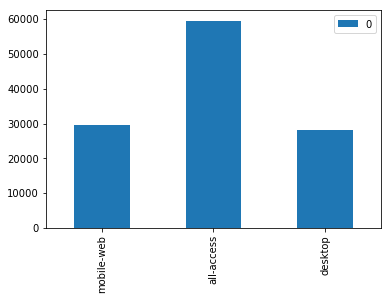

In [217]:
plothist(train_no_na.access)

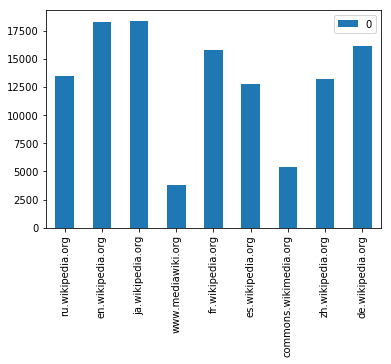

In [218]:
plothist(train_no_na.project)

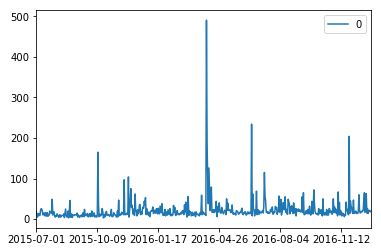

In [273]:
%matplotlib inline 
train_no_na.iloc[0:1,0:-3].T.plot()

# Strcuture the data for training

### To do

    1.how to include multiple features -> multivariate input. in keras (batch_size, timesteps, input_dim)
        1.1 effect of including features that are constant per input X(i) 
    2. check for trend, seasonality in time series
    3. make the series stationary if needed (based on 2)
    4. produce multi-step output
    5. normalize input
    6. structure the data to the form that Keras expects

Split the data into train, valid and test

In [274]:
data = train_no_na

In [299]:
#helper function to split dataset in to train, valid and test
def splitDataset(data, valid_perc, test_perc):
    p1, p2, p3 = (data.shape[0], int(data.shape[0]*valid_perc), int(data.shape[0]*test_perc))
    train = data[0:p1 - (p2+p3)]
    valid = data[p1 - (p2 + p3): p1 - p3]
    test = data [p1 - p3:]
    return (train, valid, test)

In [298]:
data[0:5]

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,project,access,agent
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh.wikipedia.org,all-access,spider
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh.wikipedia.org,all-access,spider
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh.wikipedia.org,all-access,spider
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh.wikipedia.org,all-access,spider
5,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,7.0,...,17.0,32.0,19.0,23.0,17.0,17.0,50.0,zh.wikipedia.org,all-access,spider


## Check for Trend, Seasonality

select only the time info columns

In [315]:
tr_data = data.iloc[:, 0:-3]

choose one series

In [317]:
tr_data_1 = tr_data[0:1]

In [335]:
tr_data_1.iloc[:,0:31]

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0


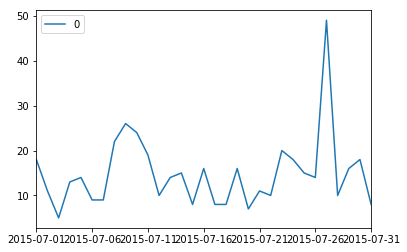

In [334]:
tr_data_1.iloc[:,0:31].T.plot()

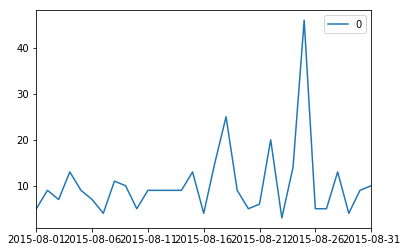

In [336]:
tr_data_1.iloc[:,31:62].T.plot()

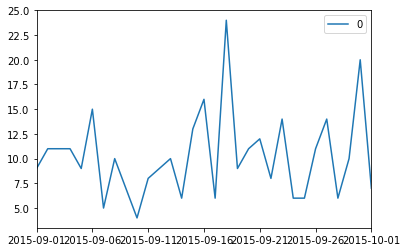

In [337]:
tr_data_1.iloc[:,62:93].T.plot()

## Check for weekly trends

In [338]:
tr_data_1.shape

(1, 550)

In [344]:
tr_data_1.iloc[:,0],tr_data_1.iloc[:,549],

(0    18.0
 Name: 2015-07-01, dtype: float64, 0    20.0
 Name: 2016-12-31, dtype: float64)

In [360]:
tr_d_1_t = tr_data_1.T
tr_d_1_t.columns = ['views']

In [364]:
tr_d_1_t.index.name = 'date'

In [366]:
tr_d_1_t[0:5]

,views
date,
2015-07-01,18.0
2015-07-02,11.0
2015-07-03,5.0
2015-07-04,13.0
2015-07-05,14.0


In [369]:
type(tr_d_1_t.index)

pandas.core.indexes.base.Index

In [370]:
tr_d_1_t.index = pd.to_datetime(tr_d_1_t.index)

In [371]:
type(tr_d_1_t.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [377]:
weekly = tr_d_1_t.groupby(pd.TimeGrouper("W"))

In [383]:
weekly.size()[0:5]

date
2015-07-05    5
2015-07-12    7
2015-07-19    7
2015-07-26    7
2015-08-02    7
Freq: W-SUN, dtype: int64

In [401]:
weekly.views.